# ターゲットエンコーディングを試みる！

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over110m2 = pd.read_csv('../data/handmade_data/over110m2.csv')
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
over90m2 = pd.read_csv('../data/handmade_data/over90m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
latitude_longitude = pd.read_csv('../data/handmade_data/latitude_longitude.csv')
broadcasts = pd.read_csv('../data/handmade_data/broadcasts.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over110m2 = pd.read_csv('../data/test_data/test_over110m2.csv')
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_over90m2 = pd.read_csv('../data/test_data/test_over90m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_latitude_longitude = pd.read_csv('../data/test_data/test_latitude_longitude.csv')
test_broadcasts = pd.read_csv('../data/test_data/test_broadcasts.csv')

In [65]:
df = pd.concat([stations,rent],axis=1)

In [66]:
df

,最寄り駅,賃料
0,1,75000
1,2,76000
2,3,110000
3,4,150000
4,5,74000
...,...,...
31465,223,80000
31466,118,54500
31467,91,125000
31468,73,98000


In [67]:
agg_df = df.groupby('最寄り駅').agg({'賃料': ['sum', 'count']})

In [68]:
agg_df

賃料      
           sum count
最寄り駅                
1     12075100   102
2     40415000   187
3     19132590   182
4     14708850   170
5      2146000    26
...        ...   ...
459     172000     1
460      88000     1
461      88000     1
462     121000     1
463      84000     1

[463 rows x 2 columns]

In [69]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [70]:
import numpy as np
ts = pd.Series(np.empty(df.shape[0]), index=df.index)

In [71]:
for _, holdout_idx in folds.split(df, df.賃料):
    # ホールドアウトする行を取り出す
    holdout_df = df.iloc[holdout_idx]
    # ホールドアウトしたデータで合計とカウントを計算する
    holdout_agg_df = holdout_df.groupby('最寄り駅').agg({'賃料': ['sum', 'count']})
    # 全体の集計からホールドアウトした分を引く
    train_agg_df = agg_df - holdout_agg_df
    # ホールドアウトしたデータの平均値を計算していく
    oof_ts = holdout_df.apply(lambda row: train_agg_df.loc[row.最寄り駅][('賃料', 'sum')]/train_agg_df.loc[row.最寄り駅][('賃料', 'count')], axis=1)
    # 生成した特徴量を記録する
    ts[oof_ts.index] = oof_ts

c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\koshi\AppData\Local\Temp\ipykernel_13564\3273470937.py:9: RuntimeWarning: invalid value encountered in double_scalars
  oof_ts = holdout_df.apply(lambda row: train_agg_df.loc[row.最寄り駅][('賃料', 'sum')]/train_agg_df.loc[row.最寄り駅][('賃料', 'count')], axis=1)
C:\Users\koshi\AppData\Local\Temp\ipykernel_13564\3273470937.py:9: RuntimeWarning: invalid value encountered in double_scalars
  oof_ts = holdout_df.apply(lambda row: train_agg_df.loc[row.最寄り駅][('賃料', 'sum')]/train_agg_df.loc[row.最寄り駅][('賃料', 'count')], axis=1)
C:\Users\koshi\AppData\Local\Temp\ipykernel_13564\3273470937.py:9: RuntimeWarning: invalid value encountered in double_scalars
  oof_ts = holdout_df.apply(lambda row: train_agg_df.loc[row.最寄り駅][('賃料', 'sum')]/train_agg_df.loc[row.最寄り駅][('賃料', 'count')], axis=1)
C:\

In [72]:
ts.name = 'holdout_ts'

In [73]:
stations_te = df.join(ts)
stations_te = stations_te.drop('賃料',axis=1)
stations_te

,最寄り駅,holdout_ts
0,1,119609.876543
1,2,216596.666667
2,3,104295.131579
3,4,87772.627737
4,5,76818.181818
...,...,...
31465,223,84457.446809
31466,118,118531.833910
31467,91,103300.447761
31468,73,99683.229814


In [74]:
np.mean(stations_te[stations_te['最寄り駅']==34])

c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


最寄り駅              34.000000
holdout_ts    125224.579832
dtype: float64

In [75]:
stations_te.to_csv('../data/handmade_data/stations_te.csv', index=False)

In [76]:
stations_te.nunique()['最寄り駅']

463

In [77]:
te_s = []
num_of_stations = stations_te.nunique()['最寄り駅']
for i in range(num_of_stations):
    mean_ts = np.mean(stations_te[stations_te['最寄り駅']==i])
    te_s.append(mean_ts)

c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [78]:
te_s = pd.DataFrame(te_s)

In [79]:
te_s

,最寄り駅,holdout_ts
0,NaN,NaN
1,1.0,118015.247175
2,2.0,215911.348782
3,3.0,105257.582807
4,4.0,86554.735023
...,...,...
458,458.0,NaN
459,459.0,NaN
460,460.0,NaN
461,461.0,NaN


In [80]:
test_stations

,最寄り駅
0,34
1,52
2,358
3,83
4,83
...,...
31257,10
31258,171
31259,67
31260,434


In [81]:
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_stations_te = pd.merge(test_stations, te_s, left_on='最寄り駅', right_on='最寄り駅', how='left')

In [82]:
test_stations_te

,最寄り駅,holdout_ts
0,34,125224.579832
1,52,151070.360429
2,358,103047.132888
3,83,97290.630023
4,83,97290.630023
...,...,...
31257,10,101462.684477
31258,171,138841.469423
31259,67,150883.982588
31260,434,414041.558442


In [83]:
len(test_stations)

31262

In [84]:
len(stations_te)

31470

In [85]:
len(test_stations_te)

31262

In [86]:
test_stations_te.to_csv('../data/test_data/test_stations_te.csv', index=False)

このターゲットエンコーディングを行なった最寄り駅をLightGBMに入れてみる！

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over110m2 = pd.read_csv('../data/handmade_data/over110m2.csv')
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
over90m2 = pd.read_csv('../data/handmade_data/over90m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
latitude_longitude = pd.read_csv('../data/handmade_data/latitude_longitude.csv')
broadcasts = pd.read_csv('../data/handmade_data/broadcasts.csv')
stations_te = pd.read_csv('../data/handmade_data/stations_te.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over110m2 = pd.read_csv('../data/test_data/test_over110m2.csv')
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_over90m2 = pd.read_csv('../data/test_data/test_over90m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_latitude_longitude = pd.read_csv('../data/test_data/test_latitude_longitude.csv')
test_broadcasts = pd.read_csv('../data/test_data/test_broadcasts.csv')
test_stations_te = pd.read_csv('../data/test_data/test_stations_te.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations_te['holdout_ts'], minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, area_per_rooms, 
kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size,test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations_te['holdout_ts'], test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets,test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms, 
test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家', 'L', 'D','S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', 'コンロ2口']

In [91]:
X_test

,築年数,面積,契約期間,定期借家,所在階,全体の階数,holdout_ts,所要時間,平均地価,部屋数,...,D,S,バス・トイレ別,建物構造,100m^2以上,75m^2以上100m^2未満,一部屋あたりの面積,コンロ2口,平均緯度,平均経度
0,588.0,50.22,NaN,1,8.0,8.0,125224.579832,15.0,6.628333e+05,2,...,1,0,2,1,0,0,25.11,0,35.620130,139.654947
1,2.0,20.88,2.0,2,3.0,4.0,151070.360429,6.0,9.213333e+05,1,...,0,0,2,1,0,0,20.88,1,35.619644,139.669097
2,280.0,26.93,2.0,2,1.0,4.0,103047.132888,10.0,5.245000e+05,1,...,0,0,2,1,0,0,26.93,0,35.742135,139.713073
3,434.0,23.57,2.0,2,1.0,2.0,97290.630023,10.0,5.557500e+05,1,...,0,0,2,0,0,0,23.57,0,35.677020,139.652127
4,544.0,50.00,2.0,2,4.0,4.0,97290.630023,12.0,5.766667e+05,2,...,1,0,2,1,0,0,25.00,0,35.689203,139.651089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31257,1.0,25.66,2.0,2,6.0,8.0,101462.684477,3.0,6.540000e+05,1,...,0,0,2,1,0,0,25.66,1,35.738207,139.719500
31258,186.0,22.71,NaN,1,8.0,15.0,138841.469423,2.0,1.503000e+06,1,...,0,0,2,1,0,0,22.71,1,35.693873,139.777159
31259,12.0,45.76,2.0,3,10.0,14.0,150883.982588,10.0,5.305000e+05,1,...,1,0,2,1,0,0,45.76,0,35.725672,139.667031
31260,184.0,55.20,NaN,1,14.0,14.0,414041.558442,3.0,3.195000e+06,1,...,0,0,2,1,0,0,55.20,0,35.686099,139.736311


Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2584
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 21
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48549.8	valid_1's rmse: 49710.3


c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is de

[20]	training's rmse: 34051.8	valid_1's rmse: 37253.6
[30]	training's rmse: 25795.1	valid_1's rmse: 30582.7
[40]	training's rmse: 21045	valid_1's rmse: 26874.1
[50]	training's rmse: 18328.7	valid_1's rmse: 24800.6
[60]	training's rmse: 16640.3	valid_1's rmse: 23595.8
[70]	training's rmse: 15572.3	valid_1's rmse: 22803.4
[80]	training's rmse: 14774.9	valid_1's rmse: 22168.7
[90]	training's rmse: 14158.6	valid_1's rmse: 21675.6
[100]	training's rmse: 13664.5	valid_1's rmse: 21283.4
[110]	training's rmse: 13262.8	valid_1's rmse: 20992.9
[120]	training's rmse: 12859.8	valid_1's rmse: 20675.3
[130]	training's rmse: 12526.4	valid_1's rmse: 20447.2
[140]	training's rmse: 12235.5	valid_1's rmse: 20285.1
[150]	training's rmse: 11966.9	valid_1's rmse: 20092.9
[160]	training's rmse: 11734.7	valid_1's rmse: 19915.4
[170]	training's rmse: 11503.1	valid_1's rmse: 19725.2
[180]	training's rmse: 11280.3	valid_1's rmse: 19585
[190]	training's rmse: 11085.1	valid_1's rmse: 19448.1
[200]	training's rmse:

c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is de

[20]	training's rmse: 34634.7	valid_1's rmse: 35737.6
[30]	training's rmse: 26553.5	valid_1's rmse: 28162
[40]	training's rmse: 22116.3	valid_1's rmse: 24244.3
[50]	training's rmse: 19619.1	valid_1's rmse: 22293.6
[60]	training's rmse: 18104.9	valid_1's rmse: 21195.2
[70]	training's rmse: 17081.3	valid_1's rmse: 20417.9
[80]	training's rmse: 16348.7	valid_1's rmse: 19898.8
[90]	training's rmse: 15786.6	valid_1's rmse: 19580.7
[100]	training's rmse: 15323.4	valid_1's rmse: 19297.6
[110]	training's rmse: 14899.4	valid_1's rmse: 18944.6
[120]	training's rmse: 14523	valid_1's rmse: 18658.4
[130]	training's rmse: 14170	valid_1's rmse: 18425
[140]	training's rmse: 13851.1	valid_1's rmse: 18229.9
[150]	training's rmse: 13554	valid_1's rmse: 18013.9
[160]	training's rmse: 13289.9	valid_1's rmse: 17816.3
[170]	training's rmse: 13067.7	valid_1's rmse: 17709.6
[180]	training's rmse: 12833.2	valid_1's rmse: 17545.9
[190]	training's rmse: 12620.7	valid_1's rmse: 17396.8
[200]	training's rmse: 12417

c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is de

[20]	training's rmse: 34623.3	valid_1's rmse: 33975.2
[30]	training's rmse: 26854.8	valid_1's rmse: 25994.6
[40]	training's rmse: 22404.4	valid_1's rmse: 21767.4
[50]	training's rmse: 19784.6	valid_1's rmse: 19766.1
[60]	training's rmse: 18246.1	valid_1's rmse: 18826.6
[70]	training's rmse: 17173.9	valid_1's rmse: 18261.5
[80]	training's rmse: 16408.5	valid_1's rmse: 17972.8
[90]	training's rmse: 15782.7	valid_1's rmse: 17740.6
[100]	training's rmse: 15251	valid_1's rmse: 17604.3
[110]	training's rmse: 14769.9	valid_1's rmse: 17548.3
[120]	training's rmse: 14377.4	valid_1's rmse: 17509.9
[130]	training's rmse: 14013.7	valid_1's rmse: 17446.8
[140]	training's rmse: 13702.6	valid_1's rmse: 17421.1
Early stopping, best iteration is:
[137]	training's rmse: 13794.7	valid_1's rmse: 17402
Start training...


c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is de

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2585
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 21
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48877.4	valid_1's rmse: 47593.4
[20]	training's rmse: 34492.6	valid_1's rmse: 35169
[30]	training's rmse: 26244.6	valid_1's rmse: 28896.9
[40]	training's rmse: 21600.8	valid_1's rmse: 25691.3
[50]	training's rmse: 19005.7	valid_1's rmse: 23995.3
[60]	training's rmse: 17371.7	valid_1's rmse: 23387.9
[70]	training's rmse: 16272.4	valid_1's rmse: 22948.6
[80]	training's rmse: 15462.5	valid_1's rmse: 22656.7
[90]	training's rmse: 14830.4	valid_1's rmse: 22494.8
[100]	training's rmse: 14302.2	valid_1's 

c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
c:\Users\koshi\python\signate\mynabi\venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is de

[20]	training's rmse: 34568	valid_1's rmse: 36640.2
[30]	training's rmse: 26647	valid_1's rmse: 28375.8
[40]	training's rmse: 22194.8	valid_1's rmse: 23760.7
[50]	training's rmse: 19720.4	valid_1's rmse: 21448.2
[60]	training's rmse: 18176.9	valid_1's rmse: 20237.1
[70]	training's rmse: 17119.7	valid_1's rmse: 19403.2
[80]	training's rmse: 16370.5	valid_1's rmse: 18870.3
[90]	training's rmse: 15730.9	valid_1's rmse: 18364.4
[100]	training's rmse: 15209.1	valid_1's rmse: 17991.2
[110]	training's rmse: 14771.1	valid_1's rmse: 17683.4
[120]	training's rmse: 14372.4	valid_1's rmse: 17433.8
[130]	training's rmse: 13982.6	valid_1's rmse: 17178.7
[140]	training's rmse: 13632.1	valid_1's rmse: 16918.8
[150]	training's rmse: 13310.3	valid_1's rmse: 16706
[160]	training's rmse: 13022.4	valid_1's rmse: 16509.3
[170]	training's rmse: 12749.4	valid_1's rmse: 16332.2
[180]	training's rmse: 12498	valid_1's rmse: 16173
[190]	training's rmse: 12250.6	valid_1's rmse: 16090.4
[200]	training's rmse: 12019

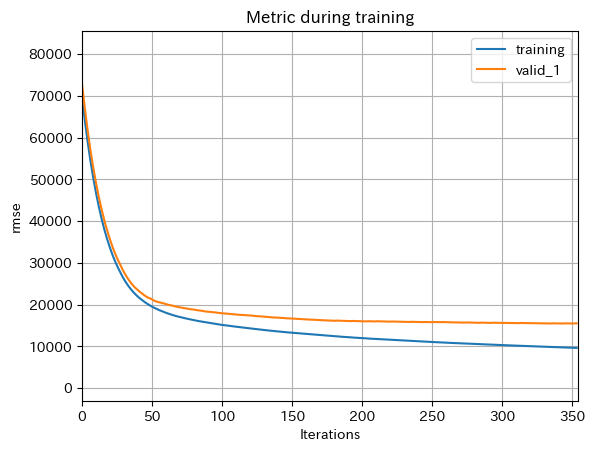

,importance
面積,4.474519e+14
L,3.888477e+14
holdout_ts,1.949073e+14
平均地価,1.273058e+14
築年数,6.804577e+13
全体の階数,2.642124e+13
一部屋あたりの面積,2.286858e+13
平均緯度,1.796959e+13
平均経度,1.530263e+13
契約期間,1.325042e+13


In [92]:
n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GBDT = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

    params = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda':  5.009615137983937e-06,
        'max_bin': 346,
        'num_leaves': 91,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)